# Topic Two: Comparing COVID-19 Impacts

It is a definite thing that our world has experienced a variance of impacts due to the panademic. Impacts on education, health, economy & nearly every aspect of our human nature was affected in probably a negative way during the combat we had with COVID-19. 

Today we are trying to understand those impacts, how different cultures decided to face the problem, decisions they took & to what those decisions lead them to. We will mainly focus on Brazil & Egypt.

To obtain a clear vision we need to understand the beginings of the crisis. We will start our journey from Brazil.

In [3]:
options(warn=-1)
library(tidyverse)
library(plotly)
library(ggthemes)
library(anytime)
library(forcats)
brazil_old <- read_csv('datasets/brazil_covid19_old.csv',col_types = cols(date = col_date(format = ""),hour = col_time(format = ""),state = col_character(),suspects = col_double(),refuses = col_double(),cases = col_number(),deaths = col_double()))


## The Story Beginning

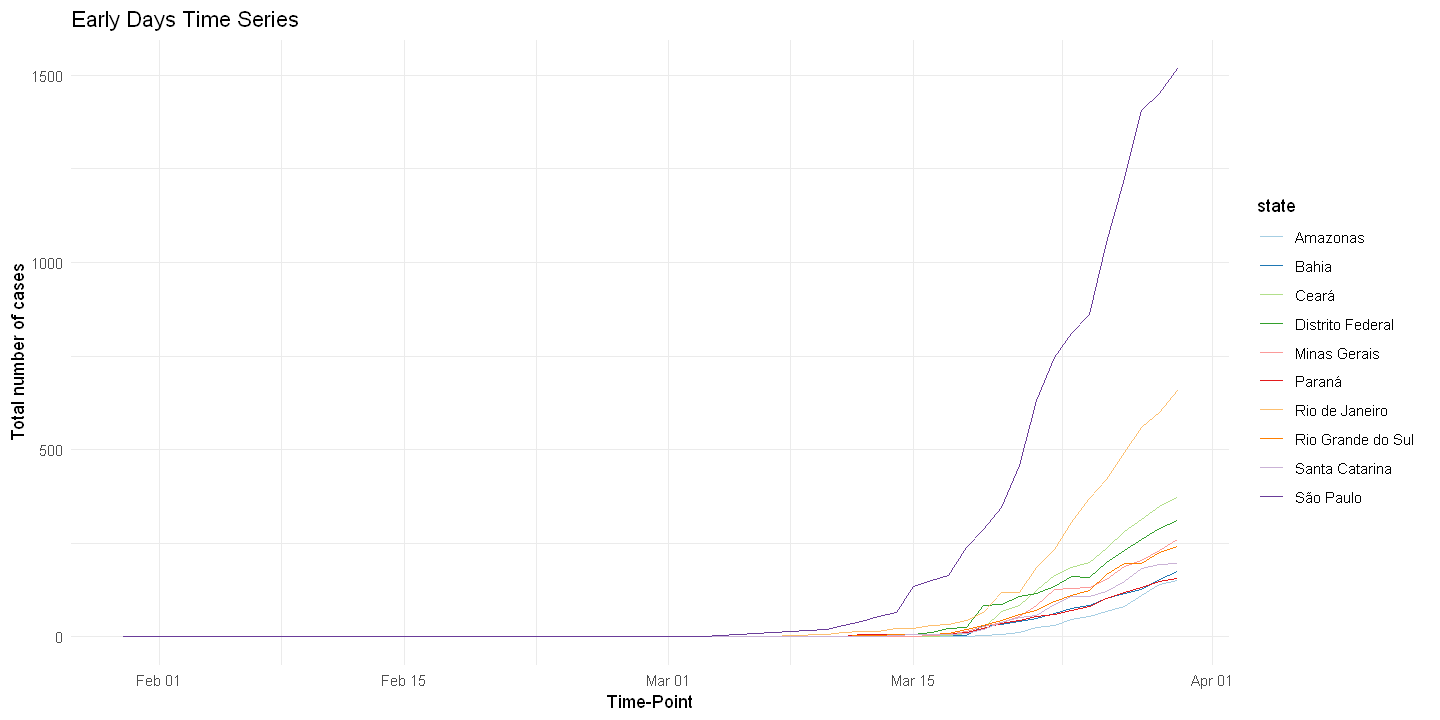

In [4]:
options(repr.plot.width = 12, repr.plot.height = 6)
crowded_states <- head(brazil_old %>% group_by(state) %>% summarize(total_cases = sum(cases)) %>% arrange(desc(total_cases)),10)$state
ggplot(data=filter(brazil_old,state %in% crowded_states),aes(x=date,y=cases,color = state))+geom_line()+ scale_color_brewer(palette = "Paired")+theme_minimal()+ggtitle("Early Days Time Series")+xlab("Time-Point")+ylab("Total number of cases")

We can see that the virus has spread dramatically after the 10th of March 2020, especially of course Sao Paulo & Rio de Janeiro which are two of the biggest tourist attractions in the whole world. Such harsh numbers in the very begining were expected to be faced with quick decisions, unfortunately that wasn not the case in Brazil.

## The Conflict ( taking decision )

In [5]:
africa <- read_csv('datasets/africa_daily_time_series_cases.csv',col_types = cols(.default = col_double(),`Country/Region` = col_character()))
egypt <- filter(africa,africa$`Country/Region` == "Egypt") %>% select(-c('Lat','Long')) %>% gather(-`Country/Region` ,key = date,value = total_cases)
colnames(egypt) <- c('Country','date','total_cases')
egypt$date <-  gsub('/','-',egypt$date)
egypt$date <- paste(egypt$date , "20",sep="")
brazil <- read_csv('datasets/brazil_covid19_macro.csv',col_types=list(col_character(),col_character(),col_character(),col_number(),col_character(),col_character(),col_character()))
brazil <- brazil[,c(2,1,4)]
colnames(brazil) <-  c('Country','date','total_cases')
class(brazil$date) <- 'character'
lockdown <- read_csv('datasets/countryLockdowndates.csv',col_types = cols(`Country/Region` = col_character(),Province = col_character(),Date = col_character(),Type = col_character(),Reference = col_character()))
lockdown <- lockdown[,c(1,3,4)]
lockdown <- filter(lockdown,lockdown[,1] == "Brazil"|lockdown[,1] == "Egypt")
lockdown[2,2] <- gsub('/','-',lockdown[2,2])
colnames(lockdown) <- c('country','date','type')
all <- rbind(egypt,brazil)
all$date <- anydate(all$date)
head(lockdown)

country,date,type
Brazil,NA,None
Egypt,24-03-2020,Full


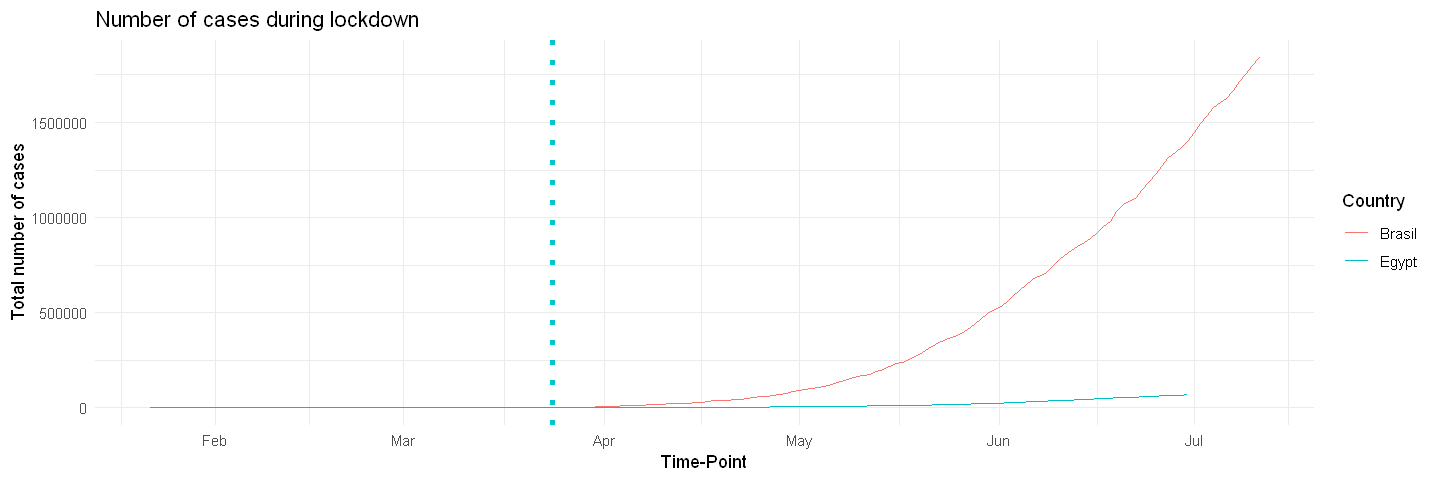

In [6]:
options(repr.plot.width = 12, repr.plot.height = 4)
ggplot(data =all ,aes(x=date,y=total_cases,color = Country))+geom_line()+geom_vline(xintercept = as.numeric(anydate('3-24-2020')),text = "3-24-2020",color = 'turquoise3',linetype = 'dotted',size = 1.5)+theme_minimal()+xlab('Time-Point')+ylab('Total number of cases')+ggtitle('Number of cases during lockdown')

Observing this plot we can see a red line for Brazil's number of cases, a blue line for Egypt's, a dotted blue line that indicates the Full lockdown applied by the Egyptian government, and one question, where is the red dotted line?

During plagues it is obligated by communities, organizations, governments & common sense to stay as much as possible away from the danger, to stay home. Egypt has done so, a full lockdown was applied on 3-24-2020 & since then the numbers barely increased on the scale of both countries.

On the other hand unfournately, not steps were taken neither by the Brazilian government nor by the social communities & since the suitable time to announce the lockdown (which was done by Egypt) we can see the rate of the disease spread dramatically went apart. That is why there is no red dotted line.

## The impact

In this kind of situations there are no winners, in fact this game is about minimizing the loss you take. Everybody was affected by the plague, but there are level of impacts you get based on your decisions & actions. We will sepctate the past, current & predicted state of the gross domestic product (GDP), which is used to estimate the size of an economy and growth rate, for both Egypt & Brazil.

In [7]:
gdp <- read_csv('datasets/GDP.csv',col_types = cols(`TABLE 1.1 Real GDP1` = col_character(),X2 = col_character(),X3 = col_character(),X4 = col_character(),X5 = col_character(),X6 = col_double(),X7 = col_double(),X8 = col_number(),X9 = col_character(),X10 = col_character(),X11 = col_logical(),X12 = col_character(),X13 = col_character()))
gdp <- gdp[,4:10]
gdp <- gdp[,-2]
gdp[28,1] <- "Egypt"
gross_domestic_product_change <- gdp[c(22,28),]
colnames(gross_domestic_product_change) <- c("Country",'2017','2018','2019','2020','2021')
gross_domestic_product_change <- gather(gross_domestic_product_change,-Country,key = year,value = gdpChangeInPercentage)
gross_domestic_product_change$year <- as.numeric(gross_domestic_product_change$year)
gross_domestic_product_change$gdpChangeInPercentage <- as.numeric(gross_domestic_product_change$gdpChangeInPercentage)

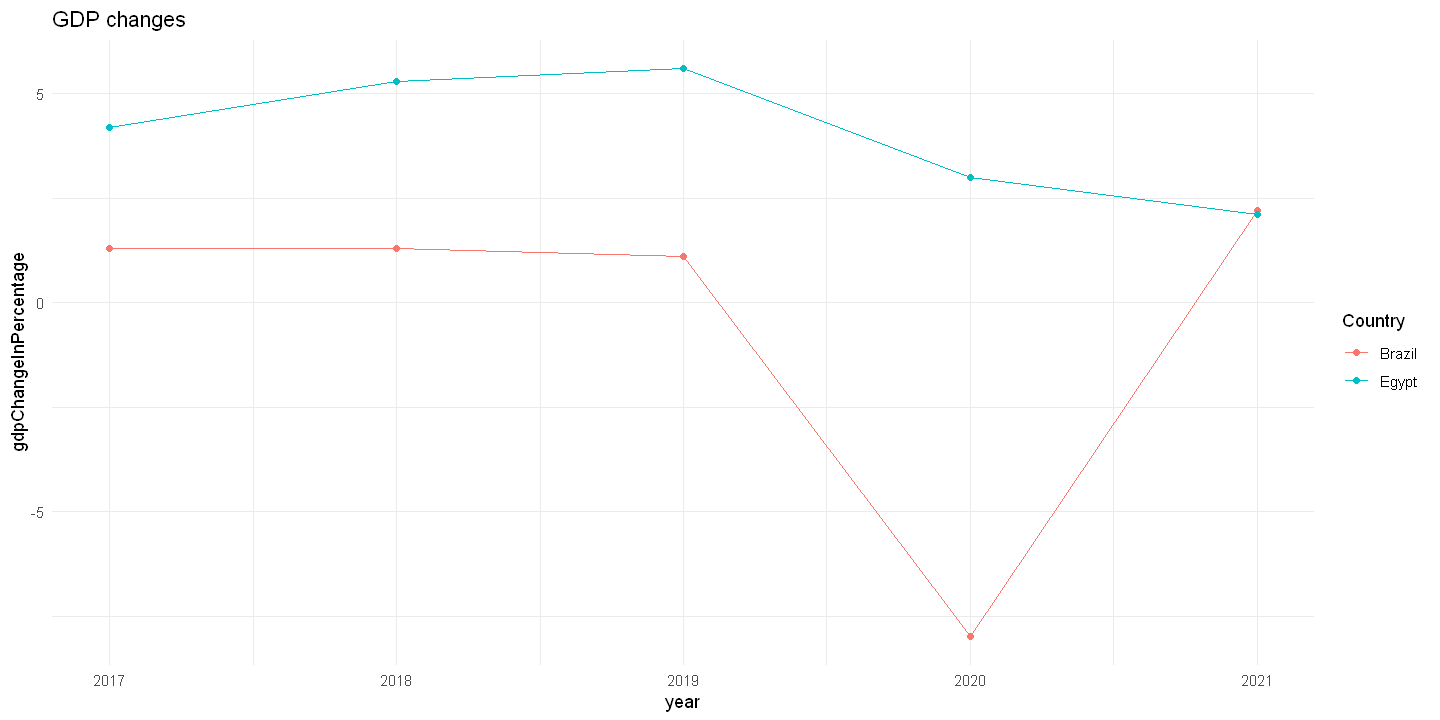

In [8]:
options(repr.plot.width = 12, repr.plot.height = 6)
ggplot(data = gross_domestic_product_change,aes(x=year,y=gdpChangeInPercentage,color = Country))+geom_line()+geom_point()+theme_minimal()+ggtitle("GDP changes")

The result is quite obvious, Brazil is taking a very huge hit in the economy this year with the GDP going down 8% from the past year. On the other hand Egypt's GDP is going up 3% from last year, yes it's not the biggest increase but in such times a profit is a profit. The gorss domestic product can be calculated in three ways, using expenditures, production, or incomes. This reflects jobs, personal income, prices & every economical aspect a citizen can experience which means that Brazillian will feel this impact right away.

## Communal Help

Good thing is charity is spreading more than ever before thanks to the internet. We see donation campaigns right & left, even online entertainers (eg:independant streamers) are taking part in many fascinating charitable campaigns. Brazil suffered hard due to mistakes that were done before, let's see how the Brazillian community will respond to it.

In [9]:
donations <- read_csv('datasets/Covid-19 - Doações Brasil - Campanhas.csv',col_types = cols(X1 = col_double(),`Campanhas de Doação - em andamento (mínimo 10 mil reais mobilizados)` = col_character(),X3 = col_character(),X4 = col_character(),X5 = col_character(),X6 = col_character(),X7 = col_character(),X8 = col_character(), X9 = col_character(),X10 = col_character(),X11 = col_character(),X12 = col_character()))
colnames(donations) <- donations[1,]
donations <- donations[-1,c(2,3,4,7)]
colnames(donations) <- c('campaign','organization','state','amount_in_dollars')
donations$amount_in_dollars <- str_replace(donations$amount_in_dollars,'\\.',',')
donations$amount_in_dollars <- str_sub(donations$amount_in_dollars, end=-4)
donations$amount_in_dollars <-  parse_number(donations$amount_in_dollars)
donations <- arrange(donations,desc(amount_in_dollars))

In the next three charts we will view the top donating organizations, states & the most successful campaigns across Brazil.

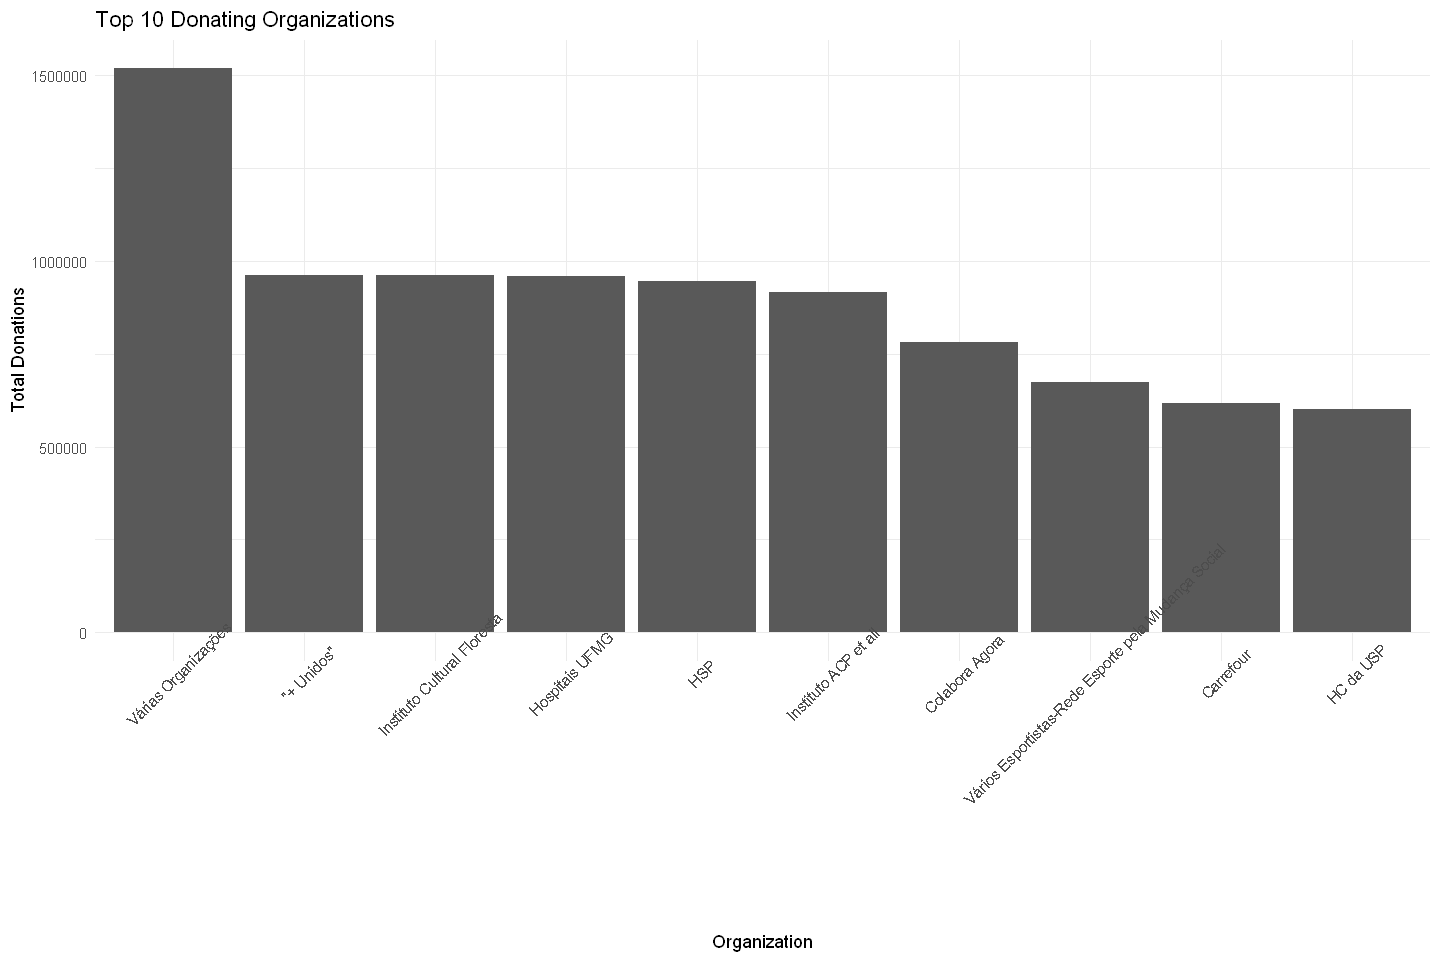

In [10]:
options(repr.plot.width = 12, repr.plot.height = 8)
donations %>% group_by(organization) %>% summarize(total_donations = sum(amount_in_dollars)) %>% arrange(desc(total_donations)) %>% head(10) %>%
ggplot(aes(x=fct_reorder(organization,total_donations,.desc = TRUE),y=total_donations))+geom_col()+theme_minimal()+theme(axis.text.x=element_text(angle = 45))+
ggtitle("Top 10 Donating Organizations") + xlab("Organization") +ylab("Total Donations")


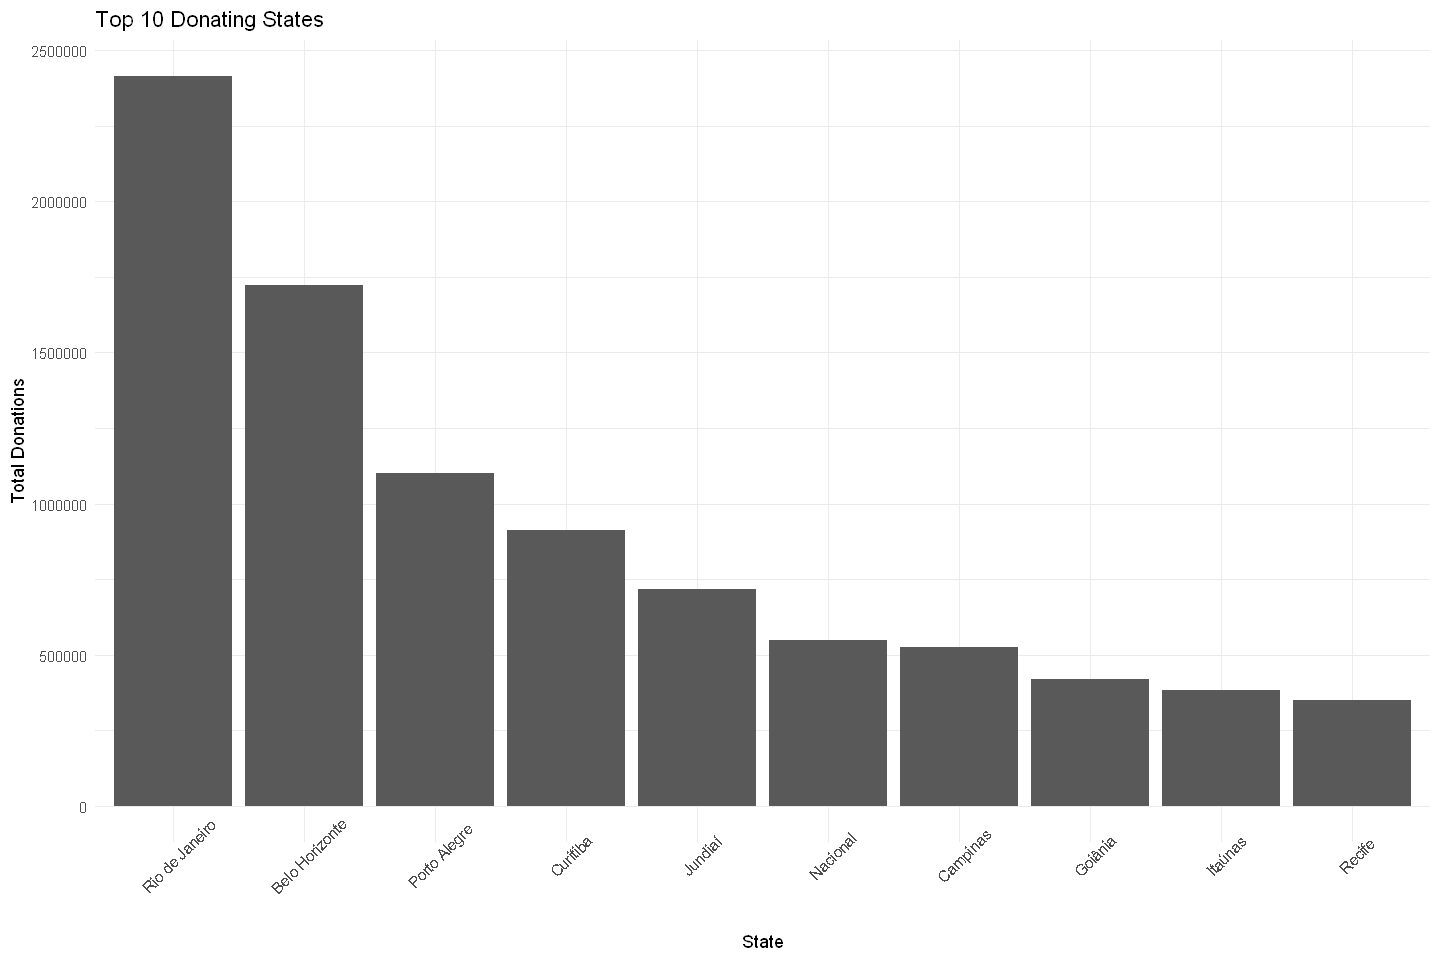

In [11]:
donations %>% group_by(state) %>% summarize(total_donations = sum(amount_in_dollars)) %>% arrange(desc(total_donations)) %>% head(10) %>%
ggplot(aes(x=fct_reorder(state,total_donations,.desc = TRUE),y=total_donations))+geom_col()+theme_minimal()+theme(axis.text.x=element_text(angle = 45))+
ggtitle("Top 10 Donating States") + xlab("State") +ylab("Total Donations")


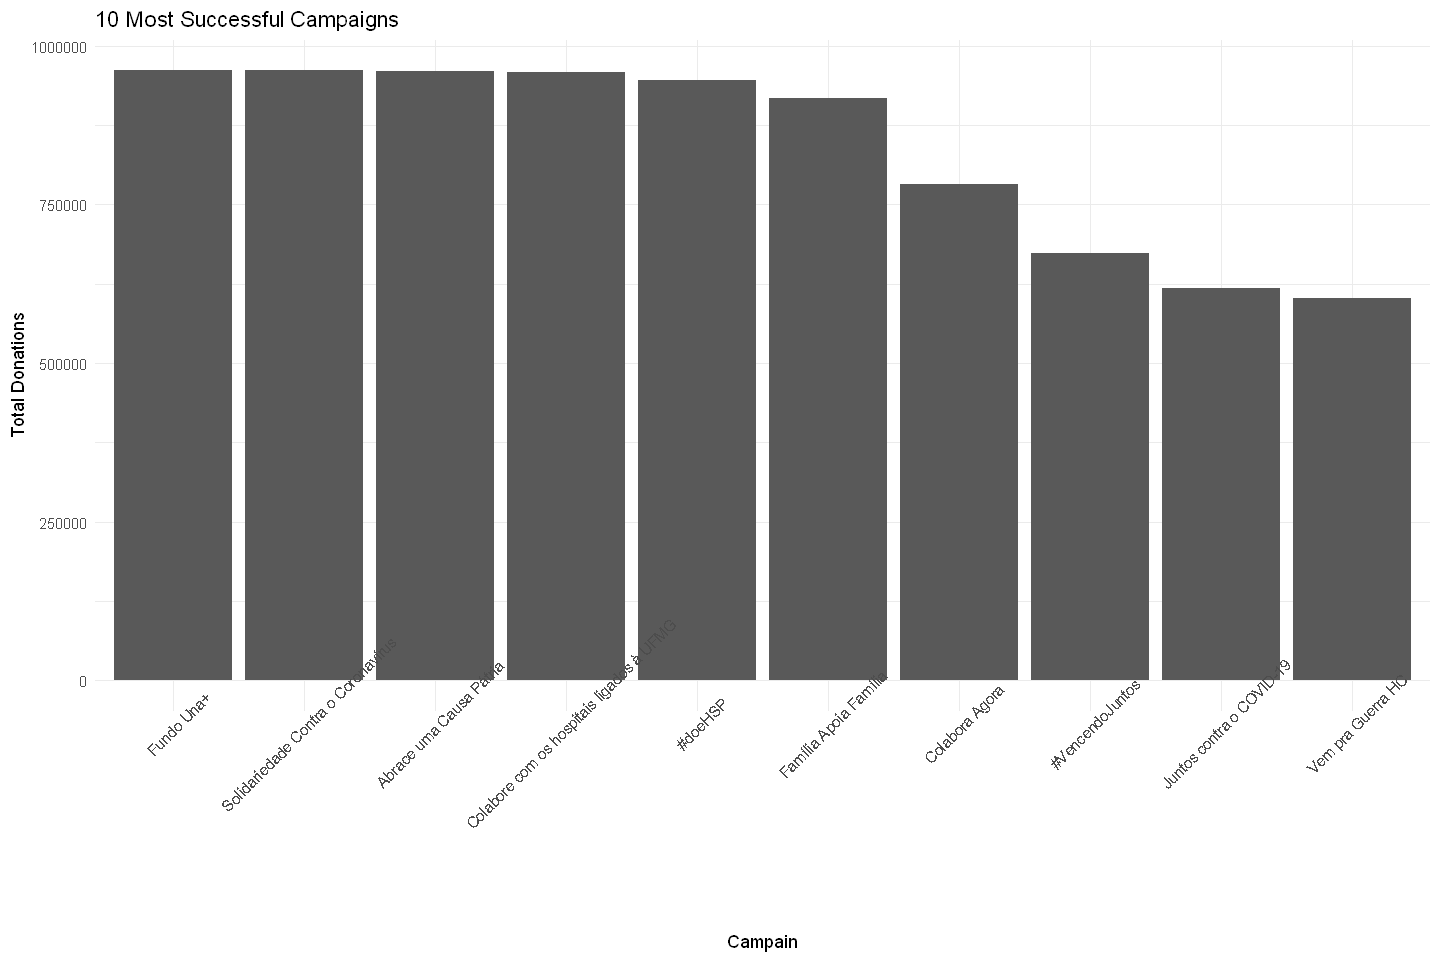

In [12]:
ggplot(data = head(donations,10),aes(x=fct_reorder(campaign,amount_in_dollars,.desc = TRUE),y=amount_in_dollars))+ geom_col()+theme_minimal()+theme(axis.text.x=element_text(angle = 45))+xlab('Campain')+ylab('Total Donations')+ggtitle('10 Most Successful Campaigns')

The amount of money raised to help those in need of aid is unbelievable. This is a good end to our story, we start with a problem and we get to the point that we have to take a decision, even if the decision may have downsides it's better than nothing, if things turned out badly we should support each other with the senses of sympathy & compassion. We wish all the good for everyone suffering from this or any other crisis. Thank you.